In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\1.ushape.csv",header=None)

C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

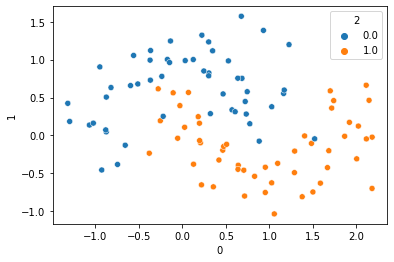

In [3]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [4]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(data[[0,1]],data[2],test_size=0.2,random_state=42)

In [5]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [6]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trf=std.fit_transform(x_tr)
x_tef=std.transform(x_te)

In [7]:
model=Sequential()

model.add(Dense(4,activation='relu',input_dim=2))

model.add(Dense(3,activation='relu'))

model.add(Dense(2,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(x_trf,y_tr,batch_size=10,epochs=450,validation_split=0.2)

Epoch 1/450
7/7 [==============================] - 0s 23ms/step - loss: 0.5173 - accuracy: 0.7500 - val_loss: 0.5620 - val_accuracy: 0.8125
Epoch 2/450
7/7 [==============================] - 0s 11ms/step - loss: 0.5153 - accuracy: 0.7500 - val_loss: 0.5607 - val_accuracy: 0.8750
Epoch 3/450
7/7 [==============================] - 0s 12ms/step - loss: 0.5134 - accuracy: 0.7500 - val_loss: 0.5593 - val_accuracy: 0.8750
Epoch 4/450
7/7 [==============================] - 0s 17ms/step - loss: 0.5122 - accuracy: 0.7500 - val_loss: 0.5581 - val_accuracy: 0.8750
Epoch 5/450
7/7 [==============================] - 0s 12ms/step - loss: 0.5102 - accuracy: 0.7500 - val_loss: 0.5567 - val_accuracy: 0.8750
Epoch 6/450
7/7 [==============================] - 0s 11ms/step - loss: 0.5085 - accuracy: 0.7500 - val_loss: 0.5552 - val_accuracy: 0.8750
Epoch 7/450
7/7 [==============================] - 0s 11ms/step - loss: 0.5069 - accuracy: 0.7500 - val_loss: 0.5539 - val_accuracy: 0.8750
Epoch 8/450
7/7 [===

In [20]:
y_cap=model.predict(x_tef)

1/1 [==============================] - 0s 40ms/step


In [21]:
y_capf=np.where(y_cap>0.5,1,0)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_te,y_capf)

0.95

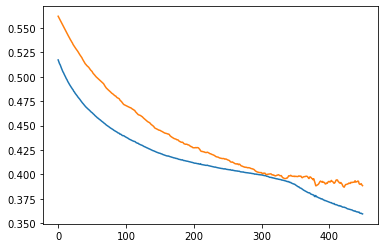

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [24]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 6s 2ms/step


<AxesSubplot:>

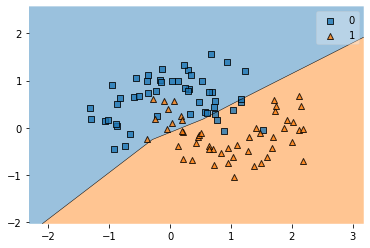

In [25]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

3888/3888 [==============================] - 6s 2ms/step


<AxesSubplot:>

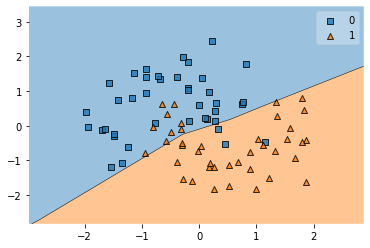

In [26]:
plot_decision_regions(x_trf,y_tr.values.astype(int),clf=model)

3888/3888 [==============================] - 7s 2ms/step


<AxesSubplot:>

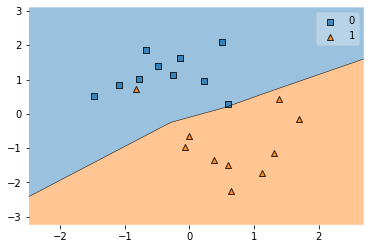

In [27]:
plot_decision_regions(x_tef,y_te.values.astype(int),clf=model)